In [2]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## 1.Загрузить файл hr.csv

In [3]:
df=pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [3]:
df_desc = df.describe()
med = []
mod = []

for b in df:
    if b not in ['sales', 'salary']:
        med.append(round(statistics.median(df[b]), 6))
        try:
            mod.append(statistics.mode(df[b]))
        except Exception as e:
            mod.append(None)

df_desc.loc['median'] = med
df_desc.loc['mode'] = mod
df_desc

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
mode,0.100000,0.550000,4.000000,NaN,3.000000,0.000000,0.000000,0.000000


## 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [27]:
def _get_correl_matrix(dfr):
    sns.heatmap(dfr.corr(),annot=True,cmap='RdYlGn',linewidths=1)
    fig=plt.gcf()
    fig.set_size_inches(10,10)
    plt.show()

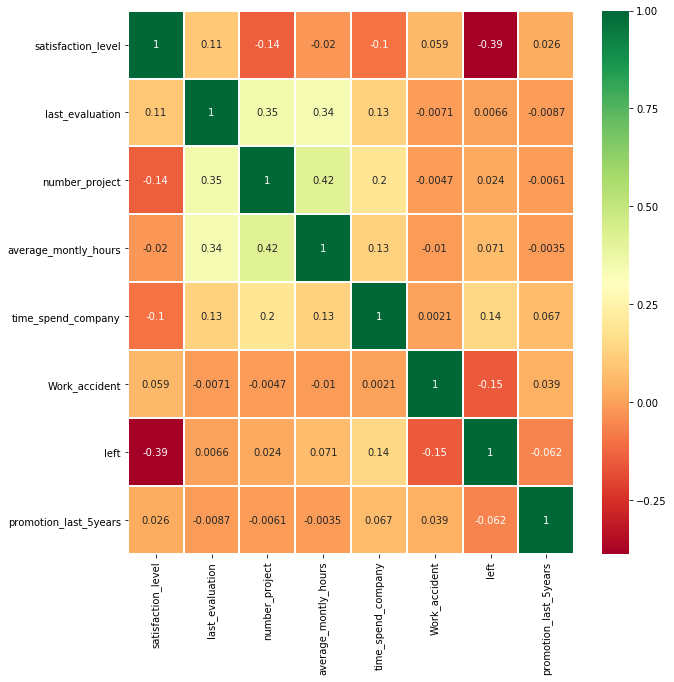

In [30]:
_get_correl_matrix(df)

## 4.Визуализировать несколько взаимосвязей между переменными.

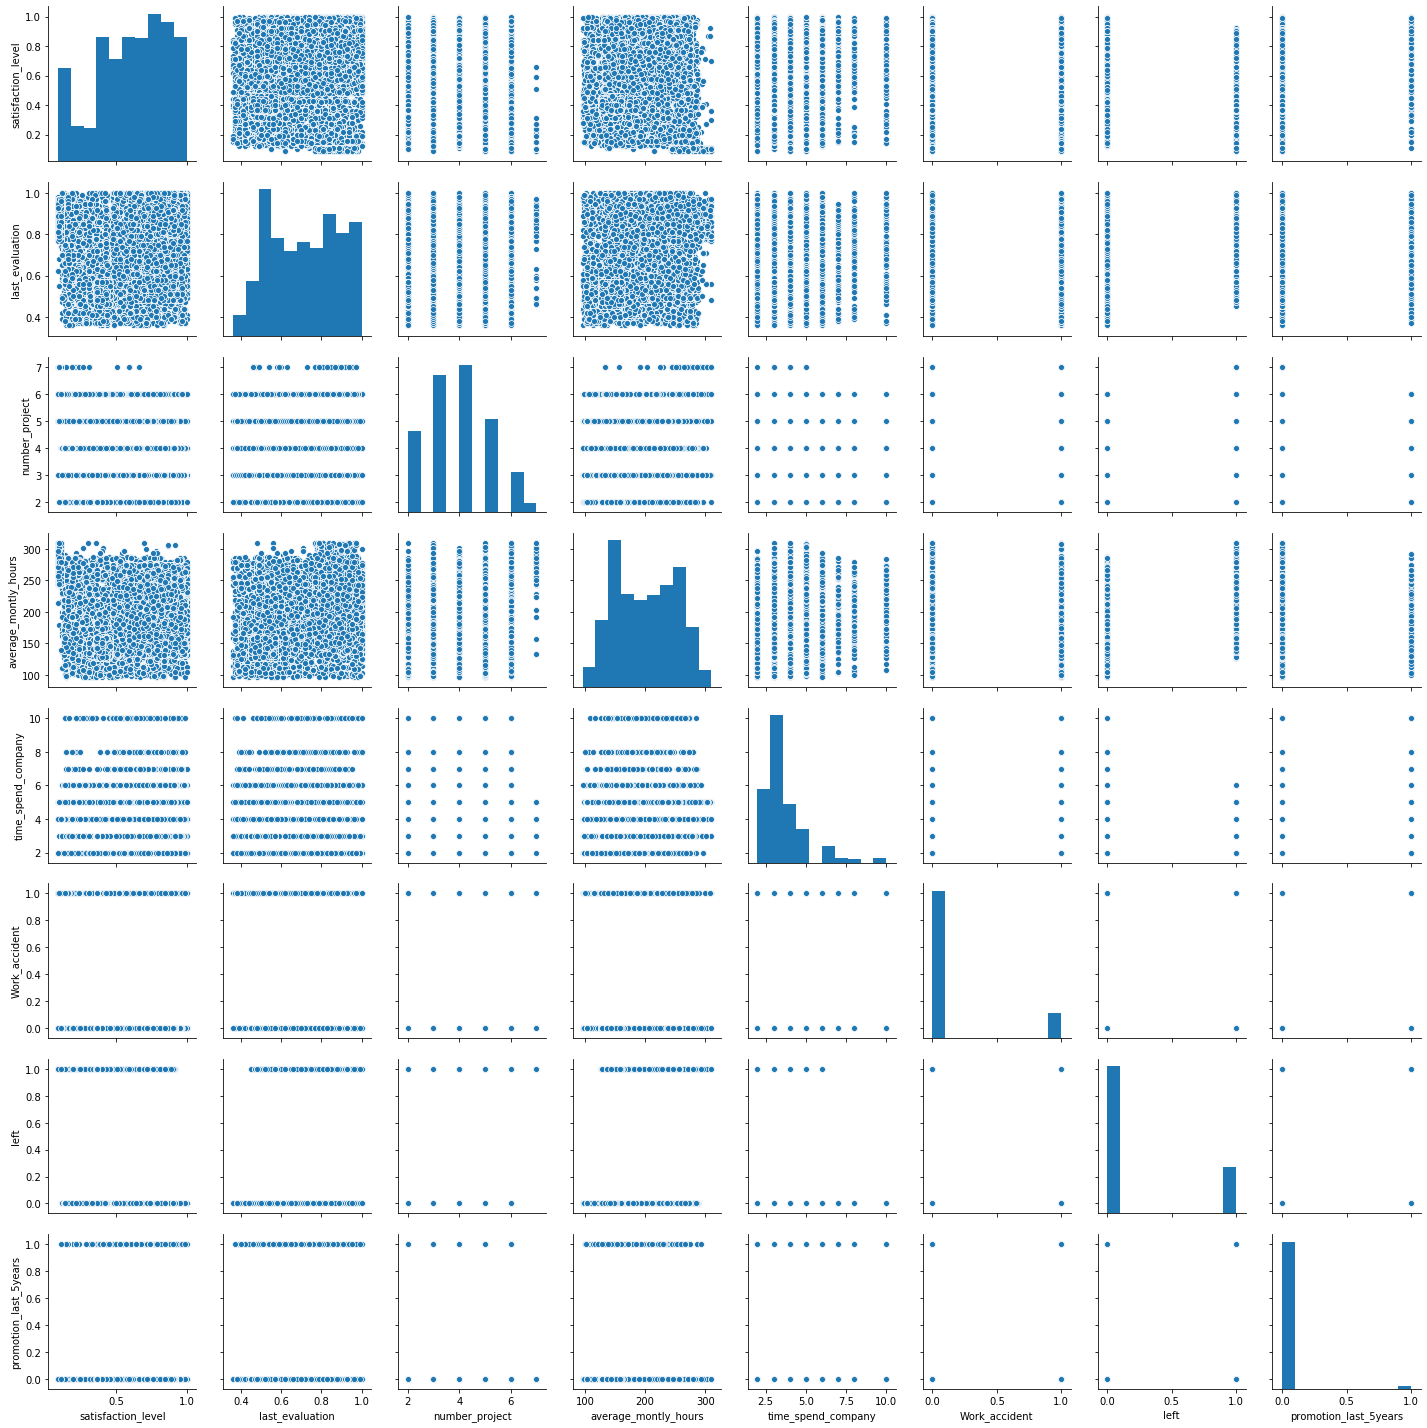

In [73]:
sns.pairplot(df)

## 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [23]:
def _get_t_test(vl1, vl2):
    t, p = stats.ttest_ind(df[vl1],df[vl2])
    print('Stats:',vl1,'and',vl2)
    print("t = " + str(t))
    print("p = " + str(p))
    print('-'*50)
    
def _get_t_test_arr(ar1, ar2):
    t, p = stats.ttest_ind(ar1,ar2)
    print("t = " + str(t))
    print("p = " + str(p))
    if p < 0.05:
        print("not equal")
    print('-'*50)

In [24]:
#satisfaction_level
#last_evaluation
#number_project
#average_montly_hours
#time_spend_company
#Work_accident
#left
#promotion_last_5years
_get_t_test('number_project', 'average_montly_hours')
_get_t_test('number_project', 'last_evaluation')
_get_t_test('average_montly_hours', 'last_evaluation')

Stats: number_project and average_montly_hours
t = -483.54229603425085
p = 0.0
--------------------------------------------------
Stats: number_project and last_evaluation
t = 303.8042100031241
p = 0.0
--------------------------------------------------
Stats: average_montly_hours and last_evaluation
t = 491.25647025928
p = 0.0
--------------------------------------------------


## 6.Рассчитать сколько работников работает в каждом департаменте.

In [180]:
## допущение, что работает = не ушел (left = 0) или не произошел несчастный случай (Work_accident = 0)

df1 = df[(df['left'] == 0) & (df['Work_accident'] == 0)].groupby('sales').salary.count().reset_index()
df1.rename(columns={'salary': 'employee_count'}, inplace=True)
df1

,sales,employee_count
0,IT,799
1,RandD,542
2,accounting,476
3,hr,442
4,management,441
5,marketing,527
6,product_mng,581
7,sales,2585
8,support,1360
9,technical,1675


## 7.Показать распределение сотрудников по зарплатам.

<BarContainer object of 3 artists>

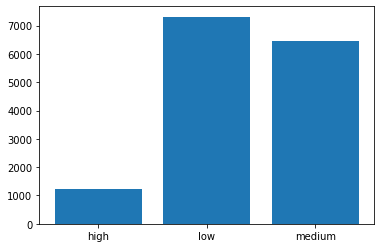

In [33]:
df2 = df.groupby('salary').sales.count().reset_index(name='employee_count')
plt.bar(df2['salary'], df2['employee_count'])

## 8.Показать распределение сотрудников по зарплатам совместно с департаментами

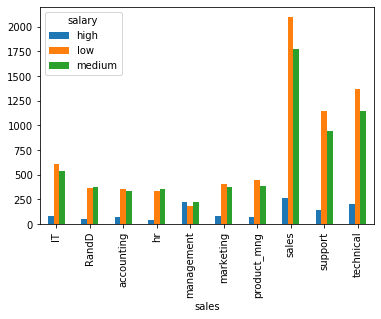

In [78]:
df3 = df.groupby(['sales', 'salary']).left.count().reset_index(name='employee_count')
df3.pivot('sales','salary','employee_count').plot(kind='bar')

## 9.Сколько сотрудников покинули компанию.

In [96]:
df[df['left'] == 1].groupby('left').salary.count()[1]

3571

## 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

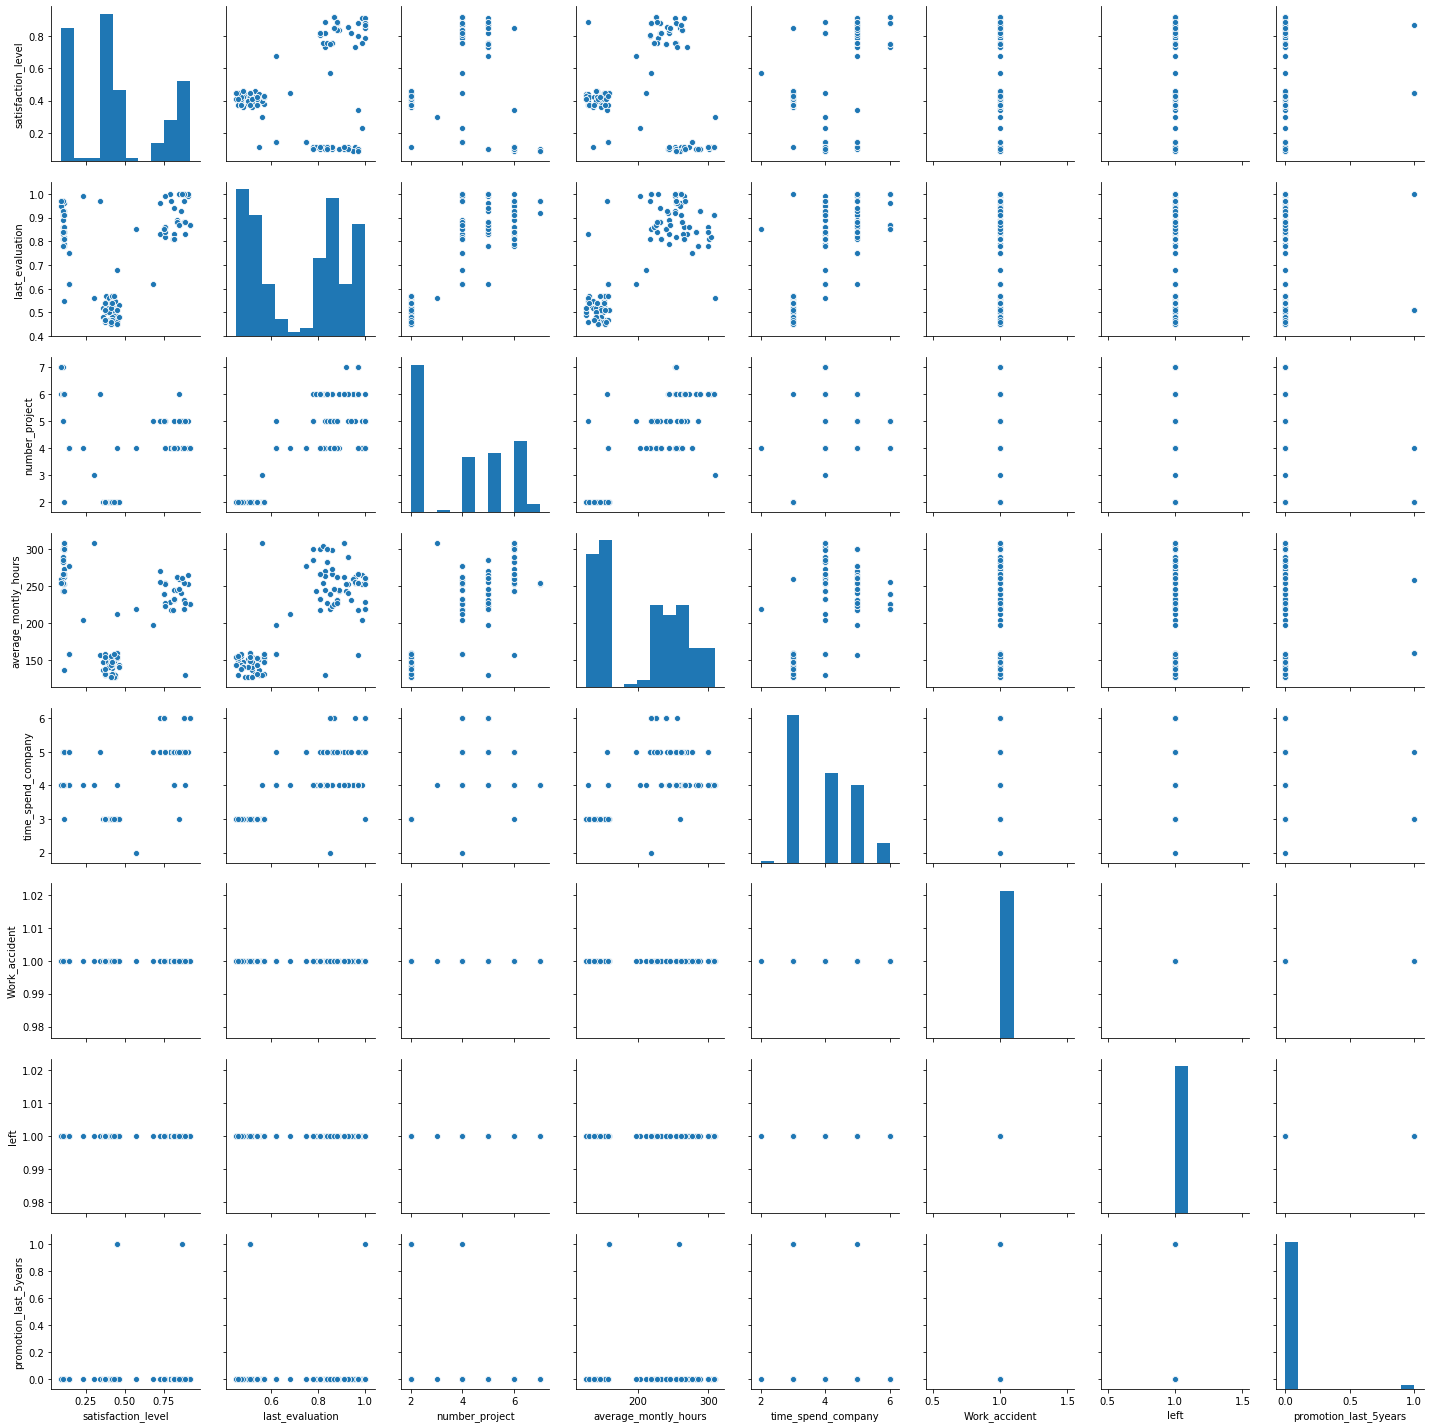

In [14]:
## датафрейм с ушедшими из компании сотрудниками
df_left = df[(df['left'] == 1) & (df['Work_accident'] == 0)]
sns.pairplot(df_left)

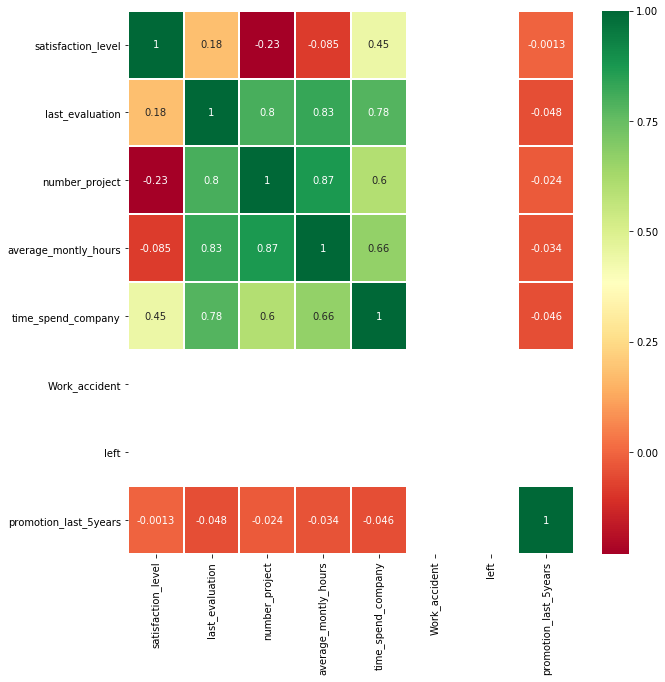

In [28]:
_get_correl_matrix(df_left)

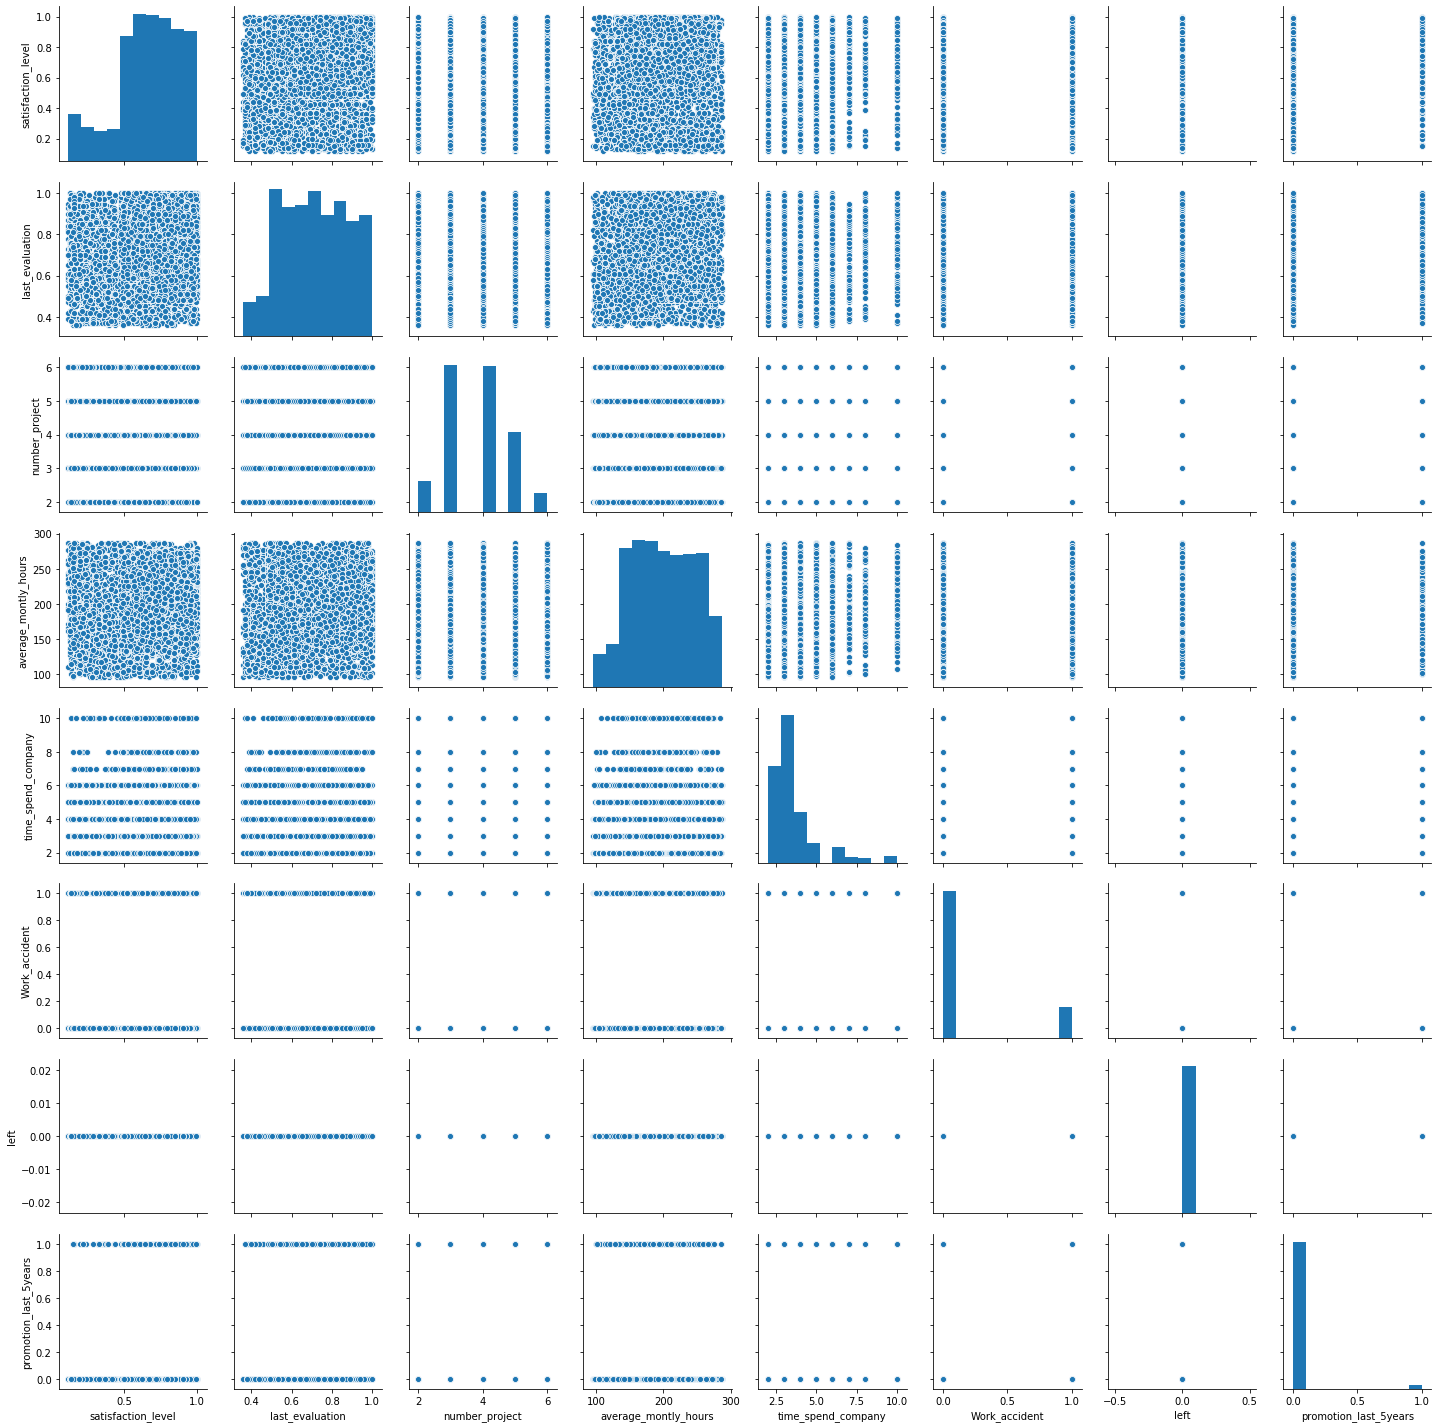

In [83]:
## датафрейм с работающими в компании сотрудниками
df_non_left = df[df['left'] == 0]
sns.pairplot(df_non_left)

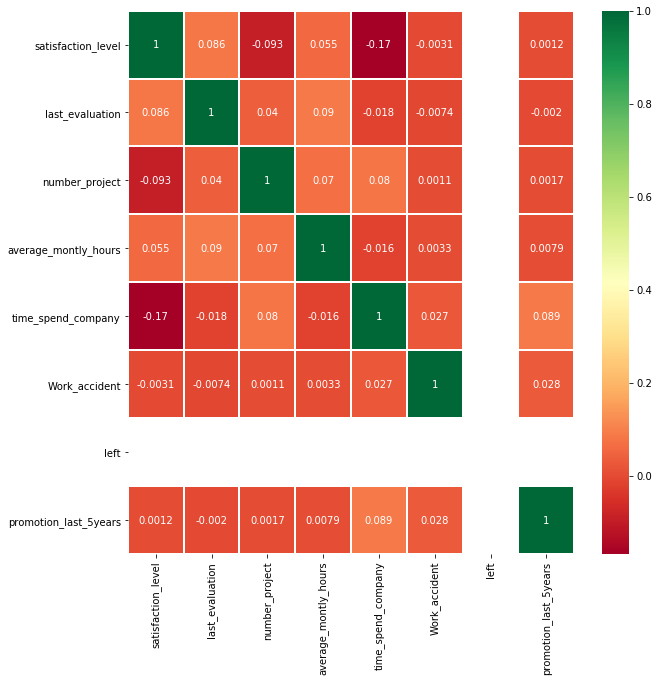

In [29]:
_get_correl_matrix(df_non_left)

In [35]:
#satisfaction_level
#last_evaluation
#number_project
#average_montly_hours
#time_spend_company
#Work_accident
#left
#promotion_last_5years

_get_t_test_arr(df_left['average_montly_hours'], df_non_left['average_montly_hours'])
_get_t_test_arr(df_left['number_project'], df_non_left['number_project'])
_get_t_test_arr(df_left['last_evaluation'], df_non_left['last_evaluation'])
_get_t_test_arr(df_left['time_spend_company'], df_non_left['time_spend_company'])

t = 8.737392732683624
p = 2.6376687439472695e-18
not equal
--------------------------------------------------
t = 3.0174162827033024
p = 0.0025537203750556157
not equal
--------------------------------------------------
t = 0.8156569943902903
p = 0.4147094437161648
--------------------------------------------------
t = 17.498306800979883
p = 7.090292153542376e-68
not equal
--------------------------------------------------


In [10]:
df[df['Work_accident']==0].groupby(['left', 'salary']).sales.count()

left  salary
0     high       963
      low       4199
      medium    4266
1     high        82
      low       2077
      medium    1243
Name: sales, dtype: int64

## Результат исследования (причины ухода из компании)
Для сотрудников, покинувших компанию наблюдается связь между переменными:
- number_project
- average_montly_hours
- last_evaluation
- time_spend_company

при этом, переменные average_montly_hours, number_project, time_spend_company различны для сотрудников покинувших компанию и продолжающих работать

Можно сделать заключение, что сотрудники приняли решение о смене работы по причинам большого количества проектов и как следствие - высокой нагрузки.
Также фактором ухода может быть неудовлетворенность финансовыми условиями, доля покинувших компанию с низкой оплатой на 35% больше (61% vs 45%)